# 6.2 Exploring Relationships between Home Value and Personal Income per Capita

## Questions to Explore

* What top 10 counties have the highest Home values in 2024? what about in 2023?
* What top 10 counties have the highest Income in 2023?
* Is there any correlation between Home Value and Years?
* Is there any correlation between income and years?
* What is the minimum annual salary for counties with top Home Values?
* Are there are any correlations between Home Value and Income?


### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

## 1. Import Visualization Libraries and Data

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [48]:
matplotlib.__version__

'3.9.2'

In [50]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [52]:
# Set Path
path = r'/Volumes/Get to Work/Data Analytics Course 2025/Personal Project'

In [54]:
# Import Data

In [56]:
df = pd.read_csv(os.path.join(path, 'Home Value (Long Format).csv'))

In [58]:
df_income = pd.read_csv(os.path.join(path, 'Income per Capita (Long Format).csv'))

In [60]:
df.head(2)

,County,State,Year,Home Value
0,Abbeville County,SC,2003,"$80,882.39"
1,Abbeville County,SC,2002,"$74,554.93"


In [62]:
#This removes space at the beginning and end of the cells
df['County']=df['County'].str.strip()
df['State']=df['State'].str.strip()

In [64]:
df['County'].unique()

array(['Abbeville County', 'Acadia Parish', 'Ada County', ...,
       'Yuba County', 'Yuma County', 'Zapata County'], dtype=object)

In [66]:
df['State'].unique()

array(['SC', 'LA', 'ID', 'OK', 'MO', 'IA', 'PA', 'OH', 'NE', 'CO', 'WI',
       'IL', 'MS', 'IN', 'WA', 'VT', 'MN', 'FL', 'NC', 'CA', 'NY', 'WY',
       'VA', 'MI', 'MD', 'KY', 'KS', 'AK', 'TN', 'TX', 'ME', 'AZ', 'GA',
       'AR', 'NJ', 'AL', 'OR', 'WV', 'MA', 'MT', 'NH', 'NM', 'ND', 'UT',
       'RI', 'SD', 'NV', 'DC', 'CT', 'HI', 'DE'], dtype=object)

In [68]:
df_income['County'].unique()

array(['Acadia Parish', 'Ascension Parish', 'Assumption Parish', ...,
       'Uinta County', 'Washakie County', 'Weston County'], dtype=object)

In [70]:
df_income.head(2)

,County,State,Year,Income per Capita
0,Acadia Parish,LA,2000,"$19,635.00"
1,Acadia Parish,LA,2001,"$21,125.00"


In [72]:
# Merge the DataFrames on County, State, and Year
merged_df = pd.merge(df_income, df, on=['County', 'State', 'Year'], how='inner')

In [74]:
# Something is wrong, there are too many duplicates. Let's clean the data. Go to section 2. Data Cleaning
merged_df

,County,State,Year,Income per Capita,Home Value
0,Acadia Parish,LA,2002,"$21,675.00",NaN
1,Acadia Parish,LA,2003,"$22,489.00",NaN
2,Acadia Parish,LA,2009,"$31,626.00","$101,962.50"
3,Acadia Parish,LA,2010,"$32,294.00","$101,751.06"
4,Acadia Parish,LA,2011,"$33,854.00","$104,755.04"
...,...,...,...,...,...
334564,Washakie County,WY,2021,"$58,601.00","$188,304.90"
334565,Washakie County,WY,2022,"$54,752.00","$390,266.29"
334566,Washakie County,WY,2022,"$54,752.00","$218,406.94"
334567,Washakie County,WY,2023,"$57,474.00","$381,970.37"


## 2. Data Cleaning

### Duplicates Check

In [76]:
df_dups = df[df.duplicated()]

In [78]:
#There are over 8000 duplicates in the home value data. 
df_dups.shape 

(8616, 4)

In [80]:
# Step 1: Clean the data - Strip spaces and replace known invalid values like '(Blanks)' with NaN
df['Home Value'] = df['Home Value'].str.strip()  # Remove leading and trailing spaces
df['Home Value'] = df['Home Value'].replace(['(Blanks)', '', None], pd.NA)  # Replace invalid entries with NaN

# Remove dollar signs and commas, then convert to float
df['Home Value'] = df['Home Value'].str.replace('[\$,]', '', regex=True)
df['Home Value'] = pd.to_numeric(df['Home Value'], errors='coerce')  # Convert to float, invalid values become NaN

# Drop rows with NaN
df.dropna(subset=['Home Value'], inplace=True)

df

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/var/folders/2c/vfk21vln5lg30cw_7hkzwsxh0000gn/T/ipykernel_1276/2785003330.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['Home Value'] = df['Home Value'].str.replace('[\$,]', '', regex=True)


,County,State,Year,Home Value
0,Abbeville County,SC,2003,80882.39
1,Abbeville County,SC,2002,74554.93
2,Abbeville County,SC,2003,64189.28
3,Abbeville County,SC,2003,63427.19
4,Abbeville County,SC,2002,61037.65
...,...,...,...,...
352237,Zapata County,TX,2013,109469.96
352238,Zapata County,TX,2012,107180.82
352239,Zapata County,TX,2010,102424.37
352240,Zapata County,TX,2009,101659.32


In [82]:
df_income_dups = df_income[df_income.duplicated()]

In [84]:
df_income_dups.shape #No Duplicates! but let's clean it, just incase

(0, 4)

In [86]:
# Step 1: Clean the data - Strip spaces and replace known invalid values like '(Blanks)' with NaN
df_income['Income per Capita'] = df_income['Income per Capita'].str.strip()  # Remove leading and trailing spaces
df_income['Income per Capita'] = df_income['Income per Capita'].replace(['(Blanks)', '', None], pd.NA)  # Replace invalid entries with NaN

# Remove dollar signs and commas, then convert to float
df_income['Income per Capita'] = df_income['Income per Capita'].str.replace('[\$,]', '', regex=True)
df_income['Income per Capita'] = pd.to_numeric(df_income['Income per Capita'], errors='coerce')  # Convert to float, invalid values become NaN

# Drop rows with NaN
df_income.dropna(subset=['Income per Capita'], inplace=True)

df_income

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/var/folders/2c/vfk21vln5lg30cw_7hkzwsxh0000gn/T/ipykernel_1276/3111120001.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_income['Income per Capita'] = df_income['Income per Capita'].str.replace('[\$,]', '', regex=True)


,County,State,Year,Income per Capita
0,Acadia Parish,LA,2000,19635.0
1,Acadia Parish,LA,2001,21125.0
2,Acadia Parish,LA,2002,21675.0
3,Acadia Parish,LA,2003,22489.0
4,Acadia Parish,LA,2004,22908.0
...,...,...,...,...
74179,Weston County,WY,2019,45537.0
74180,Weston County,WY,2020,47876.0
74181,Weston County,WY,2021,50512.0
74182,Weston County,WY,2022,51090.0


In [88]:
# Step 2: Group and average
df_avg = df.groupby(['County', 'State', 'Year'], as_index=False)['Home Value'].mean()
df_income_avg = df_income.groupby(['County', 'State', 'Year'], as_index=False)['Income per Capita'].mean()

df_avg['Home Value'] = df_avg['Home Value'].astype(int)
df_income_avg['Income per Capita'] = df_income_avg['Income per Capita'].astype(int)


In [90]:
# Step 3: Merge the dataframes- There are now a total of 48,540 merged rows (House value and Income)
merged_df_V2 = pd.merge(df_avg, df_income_avg, on=['County', 'State', 'Year'], how='inner')

merged_df_V2

,County,State,Year,Home Value,Income per Capita
0,Abbeville County,SC,2000,50121,23401
1,Abbeville County,SC,2001,52615,23029
2,Abbeville County,SC,2002,60726,21383
3,Abbeville County,SC,2003,64416,20250
4,Abbeville County,SC,2004,68112,21646
...,...,...,...,...,...
48535,Zapata County,TX,2019,132103,29731
48536,Zapata County,TX,2020,141435,29730
48537,Zapata County,TX,2021,154648,33375
48538,Zapata County,TX,2022,155962,32715


In [92]:
merged_df_V2.to_csv('merged_home_income', index=False)

### Data Check

#### House Value Info

In [45]:
df.shape

(340492, 4)

In [47]:
df.columns

Index(['County', 'State', 'Year', 'Home Value'], dtype='object')

In [49]:
df.dtypes

County         object
State          object
Year            int64
Home Value    float64
dtype: object

In [51]:
df.head()

,County,State,Year,Home Value
0,Abbeville County,SC,2003,80882.39
1,Abbeville County,SC,2002,74554.93
2,Abbeville County,SC,2003,64189.28
3,Abbeville County,SC,2003,63427.19
4,Abbeville County,SC,2002,61037.65


#### Income Info

In [53]:
df_income.shape

(74165, 4)

In [55]:
df_income.columns

Index(['County', 'State', 'Year', 'Income per Capita'], dtype='object')

In [57]:
df_income.dtypes

County                object
State                 object
Year                   int64
Income per Capita    float64
dtype: object

In [59]:
df_income.head()

,County,State,Year,Income per Capita
0,Acadia Parish,LA,2000,19635.0
1,Acadia Parish,LA,2001,21125.0
2,Acadia Parish,LA,2002,21675.0
3,Acadia Parish,LA,2003,22489.0
4,Acadia Parish,LA,2004,22908.0


### Missing Values Check

In [61]:
#No missing values
df.isnull().sum()

County        0
State         0
Year          0
Home Value    0
dtype: int64

In [63]:
#No missing values
df_income.isnull().sum()

County               0
State                0
Year                 0
Income per Capita    0
dtype: int64

## Top 10 counties by Home Value

In [69]:
filtered_data = merged_df_V2[merged_df_V2['Year'] == 2023]

In [97]:
sorted_data = filtered_data.sort_values(by='Home Value', ascending=False)

In [73]:
top_counties_home_values = sorted_data.head(10)

In [91]:
# Review if this result matches excel data- It does!
print(top_counties_home_values[['County', 'State', 'Home Value']])

                   County State  Home Value
31327    Nantucket County    MA     2544839
35073       Pitkin County    CO     2523246
42893        Teton County    WY     2456931
39338  Santa Clara County    CA     2296597
27949       Martin County    FL     2188296
39127    San Mateo County    CA     2119128
39151   San Miguel County    CO     2008949
27416        Marin County    CA     1851008
16344        Glynn County    GA     1648907
12821        Dukes County    MA     1496877


#### To find the minimum income for the top Home Values. Let's include the Income per Capita column

In [100]:
# Review if this result matches excel data- It does!
print(top_counties_home_values[['County', 'State', 'Home Value', 'Income per Capita']])

                   County State  Home Value  Income per Capita
31327    Nantucket County    MA     2544839             120333
35073       Pitkin County    CO     2523246             255839
42893        Teton County    WY     2456931             471751
39338  Santa Clara County    CA     2296597             151003
27949       Martin County    FL     2188296             114799
39127    San Mateo County    CA     2119128             172828
39151   San Miguel County    CO     2008949             156403
27416        Marin County    CA     1851008             180575
16344        Glynn County    GA     1648907              62751
12821        Dukes County    MA     1496877              98605


According to the list above the minimum income needed to qualify for a top home value in the U.S.A. is $98,605

## Top 10 counties by Income per capita

In [79]:
filtered_data_income = merged_df_V2[merged_df_V2['Year'] == 2023]

In [81]:
sorted_data_income = filtered_data_income.sort_values(by='Income per Capita', ascending=False)

In [83]:
top_counties_income = sorted_data_income.head(10)

In [93]:
# Review if this result matches excel data- It's correct!
print(top_counties_income[['County', 'State', 'Income per Capita']])

                     County State  Income per Capita
42893          Teton County    WY             471751
42032         Summit County    UT             259993
35073         Pitkin County    CO             255839
3418          Blaine County    ID             187239
27416          Marin County    CA             180575
40627        Sherman County    TX             173932
39127      San Mateo County    CA             172828
38986  San Francisco County    CA             164807
39151     San Miguel County    CO             156403
39338    Santa Clara County    CA             151003


## Exploring Relationshps

## Correlations

### Using Corrleation Matix

In [109]:
merged_df_V2.head()

,County,State,Year,Home Value,Income per Capita
0,Abbeville County,SC,2000,50121,23401
1,Abbeville County,SC,2001,52615,23029
2,Abbeville County,SC,2002,60726,21383
3,Abbeville County,SC,2003,64416,20250
4,Abbeville County,SC,2004,68112,21646


In [111]:
merged_df_V2.dtypes

County               object
State                object
Year                  int64
Home Value            int64
Income per Capita     int64
dtype: object

In [113]:
# Create a correlation matrix between the Year, Home Value, and Income using pandas
Yearmerge_df = merged_df_V2[['Year', 'Home Value', 'Income per Capita']]

In [115]:
correlation_matrix = Yearmerge_df.corr()
print(correlation_matrix)

                       Year  Home Value  Income per Capita
Year               1.000000    0.249479           0.594000
Home Value         0.249479    1.000000           0.686571
Income per Capita  0.594000    0.686571           1.000000


### The following can be deduced based on the relationship above:
1. **Home Value vs Year**:              weak relationship (0.2)
2. **Home Value vs Income per Capita**: strong relationship (0.7)
3. **Income per Capita vs Year**:       strong relationship (0.6)

In [117]:
# Create a correlation matrix between the Year and Home Value
Yhomevalue_df = merged_df_V2[['Year', 'Home Value']]
correlation_matrixyh = Yhomevalue_df.corr()
print(correlation_matrixyh)

                Year  Home Value
Year        1.000000    0.249479
Home Value  0.249479    1.000000


In [104]:
# Create a correlation matrix between the Year and Income
Yincome_df = merged_df_V2[['Year', 'Income per Capita']]
correlation_matrixyinc = Yincome_df.corr()
print(correlation_matrixyinc)


                    Year  Income per Capita
Year               1.000              0.594
Income per Capita  0.594              1.000


In [106]:
# Create a correlation matrix between Home Value and Income
Homeincome_df = merged_df_V2[['Home Value', 'Income per Capita']]
correlation_matrixyhinc = Homeincome_df.corr()
print(correlation_matrixyhinc)


                   Home Value  Income per Capita
Home Value           1.000000           0.686571
Income per Capita    0.686571           1.000000


#### Since Yearmerge_df showcases all three columns (Year, Home Value, Income per Capita) in one place. We shall focus on this data frame for the remainder of the correlation task.

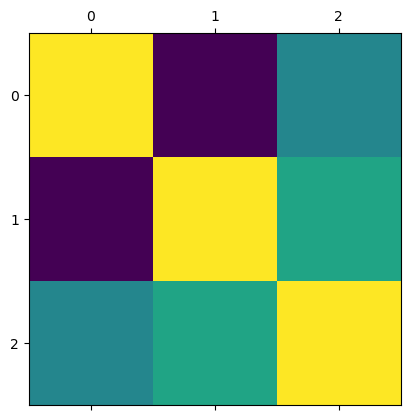

In [119]:
# Create a correlation heatmap using matplotlib
plt.matshow(Yearmerge_df.corr())
plt.show()

In [121]:
# Now let's add some labels!
plt.matshow(Yearmerge_df.corr()) # type of plot
plt.xticks(range(Yearmerge_df.shape[1]), Yearmerge_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(Yearmerge_df.shape[1]), Yearmerge_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Text(0.5, 1.0, 'Correlation Matrix')

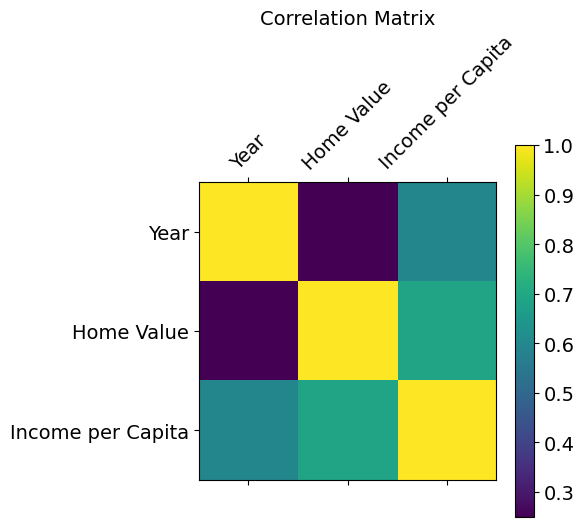

In [112]:
plt.show()

In [248]:
#save image
plt.matshow(Yearmerge_df.corr())
plt.savefig("YHincome.png") 

### Using Corrleation heatmap (Seaborn)

In [123]:
# Create a correlation matrix between the Year, Home Value, and Income using pandas
Yearmerge_df = merged_df_V2[['Year', 'Home Value', 'Income per Capita']]

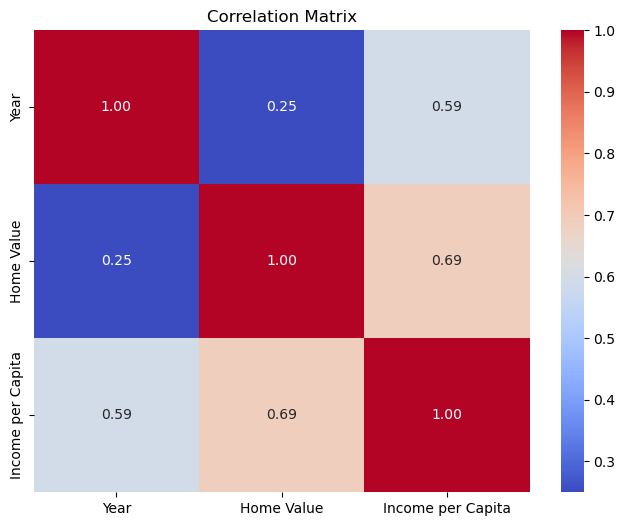

In [127]:
# Calculate the correlation matrix
correlation_matrix = Yearmerge_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [132]:
#save image
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig("YHincomeheatmap.png") 

### Using Scatterplots

In [94]:
# Create a correlation matrix between the Year, Home Value, and Income using pandas
Yearmerge_df = merged_df_V2[['Year', 'Home Value', 'Income per Capita']]

In [96]:
# Set the y-axis limits to the year range 2000 - 2026
plt.ylim([2000, 2026])
plt.xlim([15000, 3000000])

(15000.0, 3000000.0)

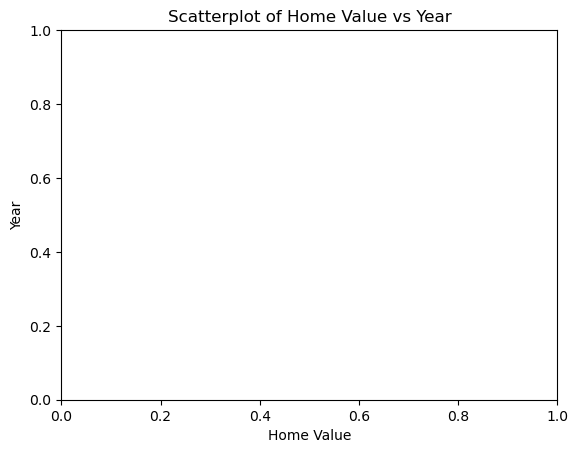

In [102]:
#Why isn't graph showing?
#Show the plot
plt.title('Scatterplot of Home Value vs Year')
plt.xlabel('Home Value')
plt.ylabel('Year')
plt.show()

In [135]:
# Create a correlation matrix between the Year, Home Value, and Income using pandas
Yearmerge_df = merged_df_V2[['Year', 'Home Value', 'Income per Capita']]

In [158]:
# Create a scatterplot for the "Income per Capita" and "Year" columns in seaborn
sns.lmplot(x = 'Income per Capita', y = 'Year', data = Yearmerge_df)

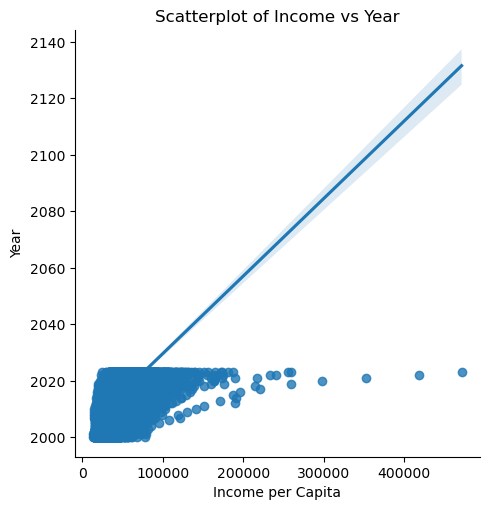

In [160]:
#Show the plot
plt.title('Scatterplot of Income vs Year')
plt.xlabel('Income per Capita')
plt.ylabel('Year')
plt.show()

### Using Pair Plots

In [146]:
# Create a correlation matrix between the Year, Home Value, and Income using pandas
Yearmerge_df = merged_df_V2[['Year', 'Home Value', 'Income per Capita']]

In [148]:
# Create a pair plot
sns.pairplot(Yearmerge_df)

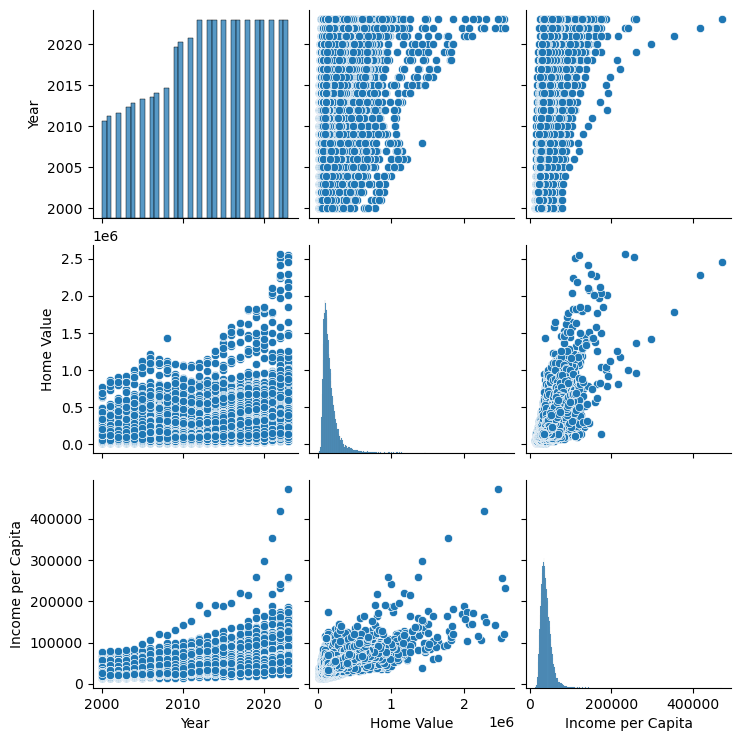

In [206]:
plt.show()

### Using Categorical Plots

#### Create a categorical variable that splits the "Home Value" column into categories

In [186]:
# Create a correlation matrix between the Year, Home Value, and Income using pandas
Yearmerge_df = merged_df_V2[['Year', 'Home Value', 'Income per Capita']]

In [188]:
# Create the histogram plot
sns.histplot(Yearmerge_df['Home Value'], bins = 30, kde = True)

<Axes: xlabel='Home Value', ylabel='Count'>

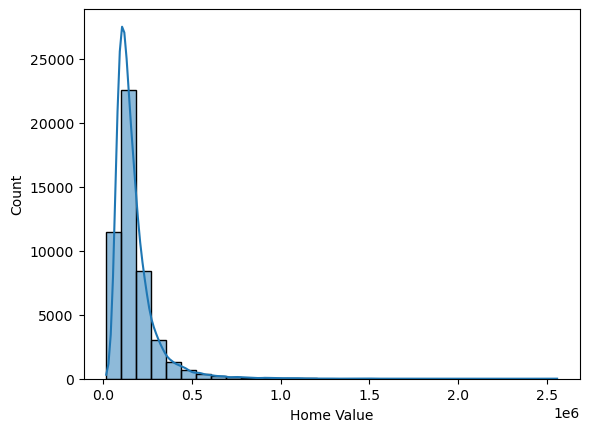

In [190]:
plt.show()

#### Group and label the categories

In [137]:
Yearmerge_df = Yearmerge_df.copy()

In [139]:
Yearmerge_df.loc[Yearmerge_df['Home Value'] < 300000, 'Home Value Category'] = 'Low Value'

In [141]:
Yearmerge_df.loc[(Yearmerge_df['Home Value'] > 300000) & (Yearmerge_df['Home Value'] < 750000), 'Home Value Category'] = 'Medium Value'

In [143]:
Yearmerge_df.loc[Yearmerge_df['Home Value'] > 750000, 'Home Value Category'] = 'High Value'

In [145]:
Yearmerge_df['Home Value Category'].value_counts(dropna = False)

Home Value Category
Low Value       43919
Medium Value     4250
High Value        371
Name: count, dtype: int64

In [147]:
Yearmerge_df.columns

Index(['Year', 'Home Value', 'Income per Capita', 'Home Value Category'], dtype='object')

In [153]:
# Sample a subset of the data to speed up plotting (e.g., 1% of the data) to reduce energy and save space
sample_df = Yearmerge_df.sample(frac=0.01, random_state=42)
sns.catplot(x='Home Value', y='Year', hue='Home Value Category', data=sample_df)

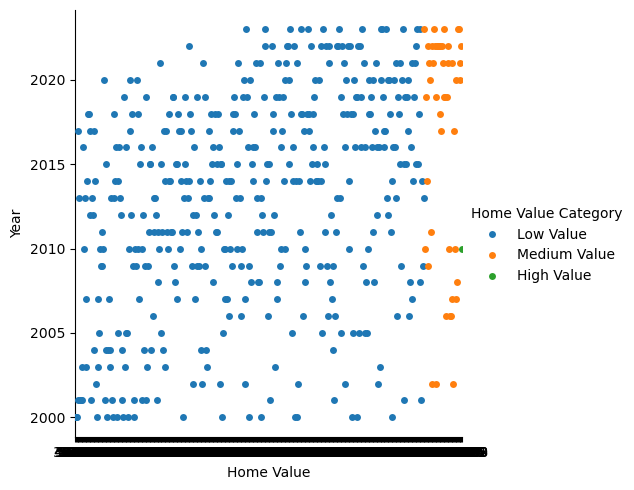

In [151]:
plt.show()

In [ ]:
sns.set(style="ticks")
sns.catplot(x='Home Value', y='Year', hue='Home Value Category', data=Yearmerge_df)